In [1]:
# Environmental Informatics
# Author: Jiahao Xia
# Date: 2019-12-8

In [2]:
# HW3
import os
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot, lag_plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# read BEAST data
mfile = "Said/CR6Series-BEASToffice_AVG_DATA as of 2019-11-24.csv"
mdata = pd.read_csv(mfile, header=1)
mdata.drop(index=[0,1], inplace=True)

C:\Users\RISE-Alienware2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,

In [4]:
mdata.head(5)

,TIMESTAMP,RECORD,G1_L2_W_Avg,G1_L2_F_I_Avg,G1_L2_F_E_Avg,G1_L4_W_Avg,G1_L4_F_M_Avg,G2_L2_W_Avg,G2_L2_F_M_Avg,G2_L4_W_Avg,...,D_H6_L2_T_T_Temp_Avg,D_H6_L2_B_L_Temp_Avg,D_H6_L2_B_T_Temp_Avg,D_H6_L4_T_L_Temp_Avg,D_H6_L4_T_T_Temp_Avg,D_H6_L4_B_L_Temp_Avg,D_H6_L4_B_T_Temp_Avg,D_H7_L1_T_L_Temp_Avg,D_H7_L2_T_L_Temp_Avg,D_H7_L4_T_L_Temp_Avg
2,2019-10-07 16:24:00,0,1985.9,2762.246,2533.644,2708.908,2086.918,2476.489,2767.677,2122.113,...,74.15,75.09,75.22,73.8,73.56,74.87,74.33,75.04,73.45,73.34
3,2019-10-07 16:27:00,1,1986.6,2760.878,2532.68,2710.262,2086.228,2474.622,2768.214,2122.083,...,74.21,75.13,75.26,73.86,73.64,74.91,74.37,75.08,73.5,73.4
4,2019-10-07 16:24:00,0,1985.9,2762.246,2533.644,2708.908,2086.918,2476.489,2767.677,2122.113,...,74.15,75.09,75.22,73.8,73.56,74.87,74.33,75.04,73.45,73.34
5,2019-10-07 16:27:00,1,1986.6,2760.878,2532.68,2710.262,2086.228,2474.622,2768.214,2122.083,...,74.21,75.13,75.26,73.86,73.64,74.91,74.37,75.08,73.5,73.4
6,2019-10-07 16:30:00,2,1987.151,2759.805,2533.382,2709.653,2086.003,2474.306,2767.402,2123.28,...,74.17,75.05,75.19,73.81,73.62,74.83,74.3,75.02,73.45,73.35


In [7]:
# find the header of displacement and temperature
measure_index = mdata.columns.values.tolist()
temp_headers = []#temperature
disp_headers = []#displacement
pressure_headers = []#pressure
for header in measure_index:
    identity = header.split('_')
    if "RECORD" in identity:
        continue
    elif "Temp" in identity:
        temp_headers.append(header)
    elif "Pres" in identity:
        pressure_headers.append(header)
    else:
        disp_headers.append(header)

In [8]:
print(temp_headers)

['G1_L2_W_Temp_Avg', 'G1_L2_F_I_Temp_Avg', 'G1_L2_F_E_Temp_Avg', 'G1_L4_W_Temp_Avg', 'G1_L4_F_M_Temp_Avg', 'G2_L2_W_Temp_Avg', 'G2_L2_F_M_Temp_Avg', 'G2_L4_W_Temp_Avg', 'G2_L4_F_M_Temp_Avg', 'G3_L2_W_Temp_Avg', 'G3_L2_F_M_Temp_Avg', 'G3_L4_W_Temp_Avg', 'G3_L4_F_M_Temp_Avg', 'G3_L6_Exp_Temp_Avg', 'G3_L6_Fix_Temp_Avg', 'G3_L6_00_Temp_Avg', 'G4_L2_W_Temp_Avg', 'G4_L2_F_I_Temp_Avg', 'G4_L2_F_E_Temp_Avg', 'G4_L4_W_Temp_Avg', 'G4_L4_F_M_Temp_Avg', 'G4_L6_Exp_Temp_Avg', 'G4_L6_Fix_Temp_Avg', 'G4_L6_00_Temp_Avg', 'P_G1_F_I_Temp_Avg', 'P_G1_F_E_Temp_Avg', 'P_G1_E_I_Temp_Avg', 'P_G1_E_E_Temp_Avg', 'P_G2_F_I_Temp_Avg', 'P_G2_F_E_Temp_Avg', 'P_G2_E_I_Temp_Avg', 'P_G2_E_E_Temp_Avg', 'P_G3_F_I_Temp_Avg', 'P_G3_F_E_Temp_Avg', 'P_G3_E_I_Temp_Avg', 'P_G3_E_E_Temp_Avg', 'P_G4_F_I_Temp_Avg', 'P_G4_F_E_Temp_Avg', 'P_G4_E_I_Temp_Avg', 'P_G4_E_E_Temp_Avg', 'D_H1_L2_T_L_Temp_Avg', 'D_H1_L4_T_L_Temp_Avg', 'D_H2_L2_T_L_Temp_Avg', 'D_H2_L2_T_T_Temp_Avg', 'D_H2_L2_B_L_Temp_Avg', 'D_H2_L2_B_T_Temp_Avg', 'D_H2_L4_

2th header of temperature: G1_L2_F_I_Temp_Avg
cooresponding header of displacement: G1_L2_F_I_Avg
3th header of temperature: G1_L2_F_E_Temp_Avg
cooresponding header of displacement: G1_L2_F_E_Avg
4th header of temperature: G1_L4_W_Temp_Avg
cooresponding header of displacement: G1_L4_W_Avg
5th header of temperature: G1_L4_F_M_Temp_Avg
cooresponding header of displacement: G1_L4_F_M_Avg
6th header of temperature: G2_L2_W_Temp_Avg
cooresponding header of displacement: G2_L2_W_Avg


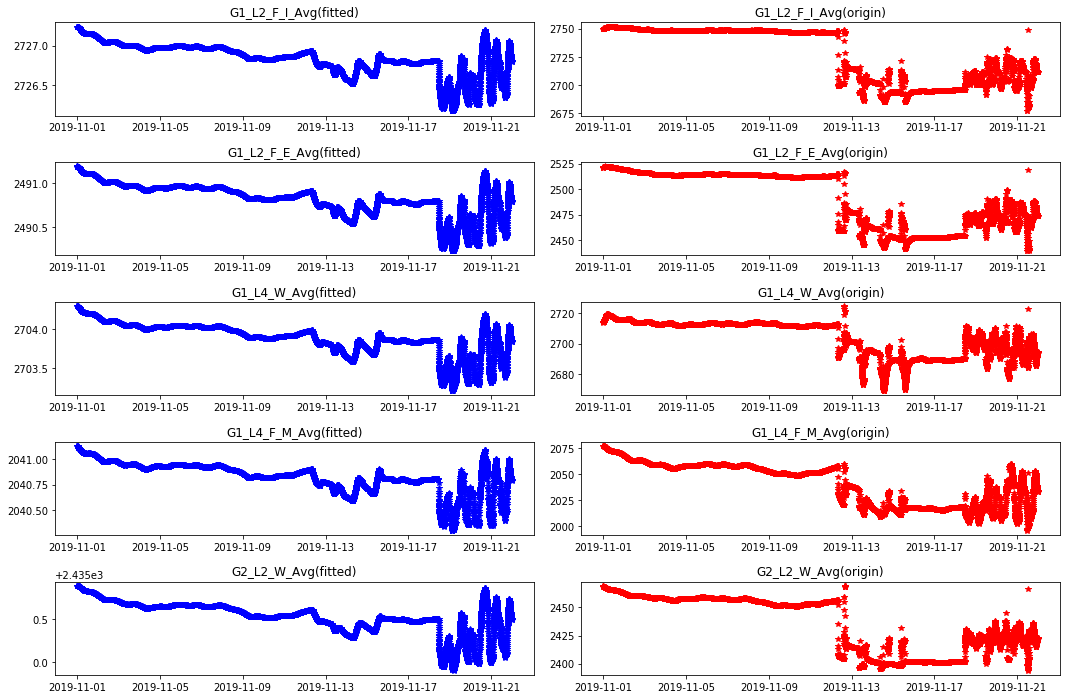

In [87]:
alpha = 0.0000072
num_of_sensors = 5
fig, axs = plt.subplots(num_of_sensors, 2, figsize=(18,12))
plt.subplots_adjust(wspace =0.1, hspace =0.5)
for i in range(1,6,1):
    temp_header = temp_headers[i]
    print("{}th header of temperature: {}".format(i+1,temp_header))
    # find the cooresponding displacement
    sensor_no = temp_header.replace('_Temp_Avg', '')
    for j in range(len(disp_headers)):
        if (sensor_no in disp_headers[j]) & ('Avg' in disp_headers[j]):
            disp_header = disp_headers[j]
            break
    print("cooresponding header of displacement: {}".format(disp_header))
    data = mdata.loc[:,['TIMESTAMP',temp_header, disp_header]]
    data = data.dropna(axis=0, how='any')
    data['TIME'] = pd.to_datetime(data['TIMESTAMP'])
    data = data[(data['TIME']>pd.to_datetime('1/11/2019',dayfirst=True)) & 
                (data['TIME']<pd.to_datetime('22/11/2019',dayfirst=True))]
    # calcaulate the parameter K
    model = LinearRegression(fit_intercept=False)
    temp = data.loc[:,temp_header].values
    temp = temp.astype(float)
    disp = data.loc[:,disp_header].values
    disp = disp.astype(float)
    TIME = data.loc[:,'TIME'].values
    model_data = pd.DataFrame({'x': np.exp(alpha * temp), 'y': disp, 'TIME': TIME})
    model_data = model_data.dropna(axis=0, how='any')
    x = model_data['x'].values
    y = model_data['y'].values
    model.fit(x.reshape(-1,1),y.reshape(-1,1))
    slope = model.coef_[0]
    y_fitted = slope * x
    axs[i-1,0].plot(model_data['TIME'].values, y_fitted, 'b*')
    axs[i-1,0].set_title(disp_header + '(fitted)')
    axs[i-1,1].plot(model_data['TIME'].values, y, 'r*')
    axs[i-1,1].set_title(disp_header + '(origin)')
    

In [88]:
fig.savefig('EI_HW3.jpg')